<a href="https://colab.research.google.com/github/sankar-6/UM-ML-Projects/blob/main/Thyroid_Cancer_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Importing Libraries and Loading the data

In [428]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [429]:
df=pd.read_csv('/content/thyroidcancer.csv')

In [430]:
df.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


In [431]:
df.shape

(383, 17)

In [432]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   383 non-null    int64 
 1   Gender                383 non-null    object
 2   Smoking               383 non-null    object
 3   Hx Smoking            383 non-null    object
 4   Hx Radiothreapy       383 non-null    object
 5   Thyroid Function      383 non-null    object
 6   Physical Examination  383 non-null    object
 7   Adenopathy            383 non-null    object
 8   Pathology             383 non-null    object
 9   Focality              383 non-null    object
 10  Risk                  383 non-null    object
 11  T                     383 non-null    object
 12  N                     383 non-null    object
 13  M                     383 non-null    object
 14  Stage                 383 non-null    object
 15  Response              383 non-null    ob

In [433]:
df.describe()

,Age
count,383.000000
mean,40.866841
std,15.134494
min,15.000000
25%,29.000000
50%,37.000000
75%,51.000000
max,82.000000


In [434]:
df['Recurred'].value_counts()

,count
Recurred,
No,275
Yes,108


###EDA

<Axes: xlabel='Gender', ylabel='count'>

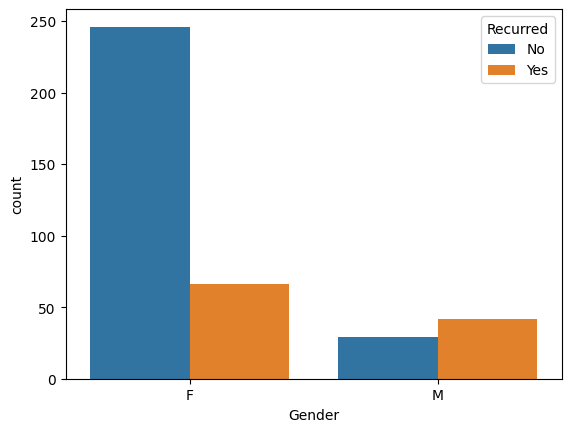

In [435]:
sns.countplot(data=df, x='Gender', hue='Recurred')

**Here Males which are present in the dataset having recurred cancer due to smoking and other harm activities**

<Axes: xlabel='Smoking', ylabel='Gender'>

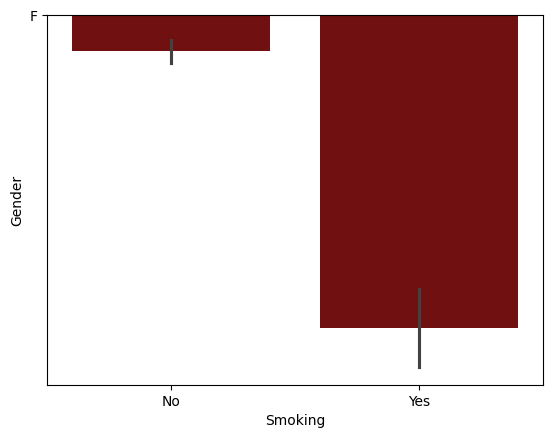

In [436]:
sns.barplot(data=df,y='Gender',x='Smoking',color='maroon')

**Here male are smoking more than female.This might be one of the reason for recurred disease**

<Axes: xlabel='Stage', ylabel='Count'>

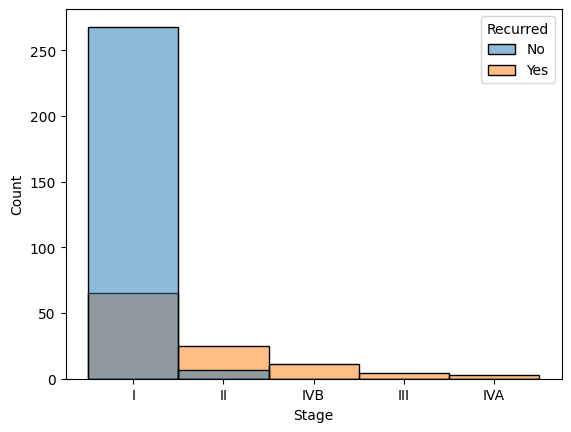

In [437]:
sns.histplot(data=df,x='Stage',hue='Recurred')

**The persons which are at stage 3,4a,4b have high chance of recurred disease**

In [438]:
df.groupby('T')['Recurred'].value_counts()

T    Recurred
T1a  No           48
     Yes           1
T1b  No           38
     Yes           5
T2   No          131
     Yes          20
T3a  No           55
     Yes          41
T3b  Yes          14
     No            2
T4a  Yes          19
     No            1
T4b  Yes           8
Name: count, dtype: int64

In [439]:
df.groupby('N')['Recurred'].value_counts()

N    Recurred
N0   No          241
     Yes          27
N1a  No           12
     Yes          10
N1b  Yes          71
     No           22
Name: count, dtype: int64

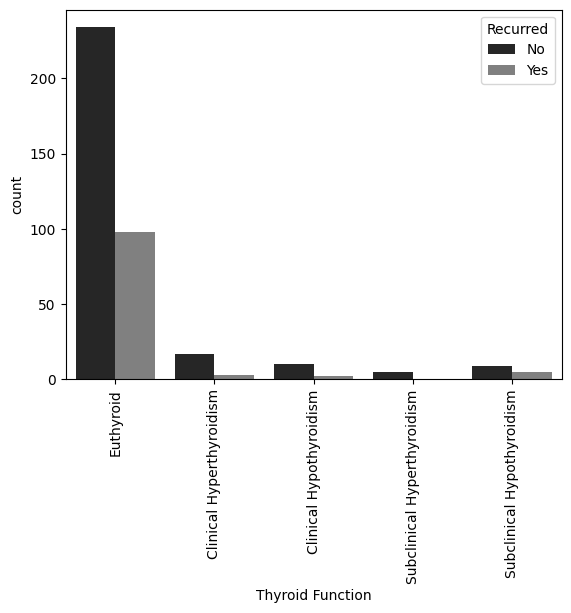

In [440]:
sns.countplot(data=df,x='Thyroid Function',hue='Recurred',color='grey')
plt.xticks(rotation=90)
plt.show()

In [441]:
df.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


In [442]:
df.groupby('Physical Examination')['Recurred'].value_counts()

Physical Examination         Recurred
Diffuse goiter               No            7
Multinodular goiter          No           88
                             Yes          52
Normal                       No            5
                             Yes           2
Single nodular goiter-left   No           63
                             Yes          26
Single nodular goiter-right  No          112
                             Yes          28
Name: count, dtype: int64

In [443]:
df['M'].value_counts()

,count
M,
M0,365
M1,18


In [444]:
df['Gender'] = df['Gender'].map({'M':0, 'F':1})
df['Smoking']=df['Smoking'].map({'No':0,'Yes':1})
df['Hx Smoking'] = df['Hx Smoking'].map({'No':0, 'Yes':1})
df['Hx Radiothreapy'] = df['Hx Radiothreapy'].map({'No':0, 'Yes':1})
df['Stage'] = df['Stage'].map({'I':0, 'II':1, 'III':2, 'IVA':3,'IVB':3})
df['Recurred']=df['Recurred'].map({'No':0,'Yes':1})
df.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,1,0,0,0,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,0,Indeterminate,0
1,34,1,0,1,0,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,0,Excellent,0
2,30,1,0,0,0,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,0,Excellent,0
3,62,1,0,0,0,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,0,Excellent,0
4,62,1,0,0,0,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,0,Excellent,0


In [445]:
df['T'] = df['T'].map({'T1a':1, 'T1b':1.5 , 'T2':2, 'T3a':3, 'T3b':3.5, 'T4a':4, 'T4b':4.5}).astype(int)
df['N'] = df['N'].map({'N0': 0, 'N1a':1, 'N1b':2})
df['M']=df['M'].map({'M0':0,'M1':1})
df['Response'] = df['Response'].map({'Excellent':0, 'Indeterminate':1, 'Biochemical Incomplete':2, 'Structural Incomplete':3})
df['Risk'] = df['Risk'].map({'Low':0, 'Intermediate':1, 'High':2})

In [446]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   383 non-null    int64 
 1   Gender                383 non-null    int64 
 2   Smoking               383 non-null    int64 
 3   Hx Smoking            383 non-null    int64 
 4   Hx Radiothreapy       383 non-null    int64 
 5   Thyroid Function      383 non-null    object
 6   Physical Examination  383 non-null    object
 7   Adenopathy            383 non-null    object
 8   Pathology             383 non-null    object
 9   Focality              383 non-null    object
 10  Risk                  383 non-null    int64 
 11  T                     383 non-null    int64 
 12  N                     383 non-null    int64 
 13  M                     383 non-null    int64 
 14  Stage                 383 non-null    int64 
 15  Response              383 non-null    in

In [450]:
df = pd.get_dummies(df, columns=['Thyroid Function','Adenopathy','Pathology','Focality'], dtype=int)

In [451]:
df.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Physical Examination,Risk,T,N,M,...,Adenopathy_Left,Adenopathy_No,Adenopathy_Posterior,Adenopathy_Right,Pathology_Follicular,Pathology_Hurthel cell,Pathology_Micropapillary,Pathology_Papillary,Focality_Multi-Focal,Focality_Uni-Focal
0,27,1,0,0,0,Single nodular goiter-left,0,1,0,0,...,0,1,0,0,0,0,1,0,0,1
1,34,1,0,1,0,Multinodular goiter,0,1,0,0,...,0,1,0,0,0,0,1,0,0,1
2,30,1,0,0,0,Single nodular goiter-right,0,1,0,0,...,0,1,0,0,0,0,1,0,0,1
3,62,1,0,0,0,Single nodular goiter-right,0,1,0,0,...,0,1,0,0,0,0,1,0,0,1
4,62,1,0,0,0,Multinodular goiter,0,1,0,0,...,0,1,0,0,0,0,1,0,1,0


In [455]:
df.drop('Physical Examination',axis=1,inplace=True)

###Model Development

In [456]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [457]:
lr=LogisticRegression()

In [458]:
X=df.drop('Recurred',axis=1)

In [459]:
y=df['Recurred']

In [460]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [462]:
lr.fit(X_train,y_train)

LogisticRegression()

In [463]:
predictions=lr.predict(X_test)

In [464]:
from sklearn.metrics import classification_report,confusion_matrix

In [465]:
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97        90
           1       0.92      0.95      0.93        37

    accuracy                           0.96       127
   macro avg       0.95      0.96      0.95       127
weighted avg       0.96      0.96      0.96       127

[[87  3]
 [ 2 35]]
